Fonte: https://medium.com/@mikesmales/sound-classification-using-deep-learning-8bc2aa1990b7

https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/

datasets: https://zindi.africa/hackathons

## Representação de Dados

## Instalação de pacotes necessários ao Notebook

In [ ]:
#!pip install pandas
#!pip search xlrd
#!pip install xlrd
#!pip search librosa
#!pip install librosa
#!pip search sndfile
#!pip install sndfile -U
#!conda search sndfile
#apt-get install libsndfile1
!pip install wavefile

In [4]:
import tensorflow.keras as keras; 
import tensorflow as tf; 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

import numpy as np
import pandas as pd

import os
import librosa
import librosa.display

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import struct

import cv2

import matplotlib.pyplot as plt

print("Versão Keras :" , keras.__version__)
print("Versão Tensorflow :" , tf.__version__)


Using TensorFlow backend.


Versão Keras : 2.2.4-tf
Versão Tensorflow : 2.1.0


Vamos tornar os tensores de dados mais concretos com alguns exemplos semelhantes aos que você encontrará mais tarde. 

Os dados que você manipulará quase sempre cairão em uma das seguintes categorias:

* Vector data:
    * 2D tensors com formato (amostras, características)
* Timeseries data or sequence 
    * data—3D tensors com formato (amostras, passos temporais , características)
* Images—4D 
    * tensors com formato 
        * (amostras,altura,largura,canais) 
        * (amostras,canais, altura,largura)
* Video —5D 
    * tensors com formato 
        * (amostras, frames, height, width, channels) 
        * (amostras, frames, channels, height, width)
    

## Diferentes formatos de tensores

In [2]:
#0d Tensor (scalar)

x = np.array(12)
print(x)
print(x.ndim)

#1d tensor
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)
    
#2d tensor
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])

print(x)
print(x.ndim)

#3d tensor
x = np.array(  [[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x)
print(x.ndim)

12
0
[12  3  6 14]
1
[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2
[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3


## Representação de datasets estruturados em colunas


* Pandas pode ser usado para representar colunas preditoras e coluna a ser predita

* Exemplo abaixo mostra colunas caracterizando resultados de exames de diversos pacientes e diagnostico para SARS-Cov2

In [3]:
df = pd.read_excel('dataset4.xlsx', encoding='utf8')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Representação de imagens

* Imagens são compostas por uma matriz de pixel
* Cada pixel pode ser definido como um ou mais valores
    * Imagens em tom de cinza possuem apenas um valor de pixel
    * Imagens codificadas como RGB (possuem 3 canais)
    
* A representação pode ser feita por uma matriz de 4 dimensções
    * Altura
    * Largura
    * Canal de cor
    * Amostras

* Há dois padrões para representar imagens como vetores:
    * channel first: dimensão de canais de cor aparece primeiro
        (amostras, canais de cor, altura, lagura)
    * channel last: dimensão de canais de cor aparece por último (padrão tensorflow - Keras)
        (amostras, altura, lagura, canais de cor)
        

In [10]:
!ls ../dogsCatsDB

bkp  cats  dogs  sampleSubmission.csv  test1  test1.zip  train	train.zip


In [11]:

print(os.listdir("../dogsCatsDB"))

['test1.zip', 'cats', 'train', 'sampleSubmission.csv', 'test1', 'dogs', 'bkp', 'train.zip']


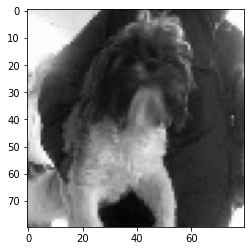

In [21]:
main_dir = "../dogsCatsDB/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [30]:
X = []
y = []
convert = lambda category : int(category == 'dog')

def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
    

In [31]:
path= "../dogsCatsDB/train"

create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [32]:
!ls ../dogsCatsDB/test1

10000.jpg  10696.jpg  1138.jpg	 12083.jpg  1526.jpg  221.jpg	2914.jpg
10001.jpg  10697.jpg  11390.jpg  12084.jpg  1527.jpg  2220.jpg	2915.jpg
10002.jpg  10698.jpg  11391.jpg  12085.jpg  1528.jpg  2221.jpg	2916.jpg
10003.jpg  10699.jpg  11392.jpg  12086.jpg  1529.jpg  2222.jpg	2917.jpg
10004.jpg  1069.jpg   11393.jpg  12087.jpg  152.jpg   2223.jpg	2918.jpg
10005.jpg  106.jpg    11394.jpg  12088.jpg  1530.jpg  2224.jpg	2919.jpg
10006.jpg  10700.jpg  11395.jpg  12089.jpg  1531.jpg  2225.jpg	291.jpg
10007.jpg  10701.jpg  11396.jpg  1208.jpg   1532.jpg  2226.jpg	2920.jpg
10008.jpg  10702.jpg  11397.jpg  12090.jpg  1533.jpg  2227.jpg	2921.jpg
10009.jpg  10703.jpg  11398.jpg  12091.jpg  1534.jpg  2228.jpg	2922.jpg
1000.jpg   10704.jpg  11399.jpg  12092.jpg  1535.jpg  2229.jpg	2923.jpg
10010.jpg  10705.jpg  1139.jpg	 12093.jpg  1536.jpg  222.jpg	2924.jpg
10011.jpg  10706.jpg  113.jpg	 12094.jpg  1537.jpg  2230.jpg	2925.jpg
10012.jpg  10707.jpg  11400.jpg  12095.jpg  1538.jpg  2231.jpg	2926.jpg

In [37]:
#Normalize data
X = X/255.0

model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

train_dir = "test1/"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

predictions = model.predict(X_test)

predicted_val = [int(round(p[0])) for p in predictions]

Train on 16800 samples, validate on 4200 samples
Epoch 1/10
16800/16800 [==============================] - 5s 274us/sample - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 2/10
16800/16800 [==============================] - 4s 267us/sample - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 3/10
16800/16800 [==============================] - 4s 241us/sample - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 4/10
16800/16800 [==============================] - 4s 250us/sample - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 5/10
16800/16800 [==============================] - 4s 247us/sample - loss: 0.6932 - accuracy: 0.4943 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 6/10
16800/16800 [==============================] - 4s 241us/sample - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 7/10
16800/16800 [===========================

In [36]:
predicted_val

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Representação de texto

* Um texto é uma linha no dataset que pode ser representado como um vetor de palavras

In [ ]:
Representação de Sequência e Séries Temporais

* Alguns fenômenos são representados como uma sequência de acontecimentos (Exemplos)
    * Variação de preço de ações
    * Sequência de palavras
    * Crescimento de animais

* Uma estratégia é representar a sequência de ações como uma sequência de colunas,
  e repetir as colunas para um número fixo de sequências

* Outra estratégia é representar cada sequência como uma linha


* O eixo do tempo é sempre o segundo eixo (eixo do índice 1), por convenção
* exemplos:

* Preços de ações. A cada minuto, armazenamos o preço atual das ações, o preço mais alto do último minuto e o preço mais baixo do último minuto. 
    * Cada minuto é codificado como um vetor 3D, um dia inteiro de negociação é codificado como um tensor 2D de forma (390, 3) (há 390 minutos em um dia de negociação)
    * dados de 250 dias podem ser armazenados em um tensor de forma 3D (250, 390,3). 

* Um conjunto de dados de tweets, em que codificamos cada tweet como uma sequência de 280 caracteres de um alfabeto de 128 caracteres únicos. 

* Nesta configuração, cada caractere pode ser codificado como um vetor binário de tamanho 128 (um vetor com todos os zeros, exceto por uma entrada 1 no índice correspondente ao caractere).

* cada tweet pode ser codificado como um tensor de forma 2D (280, 128) 

* um conjunto de dados de 1 milhão de tweets pode ser armazenado em um tensor de forma (1000000, 280, 128).

In [ ]:
!ls ../datasets/sound/UrbanSound8K

## Representação de audio

* Esse dataset (https://urbansounddataset.weebly.com/urbansound8k.html) contém 8732 amostras de audio das seguintes categorias: 

    * Air Conditioner
    * Car Horn
    * Children Playing
    * Dog bark
    * Drilling
    * Engine Idling
    * Gun Shot
    * Jackhammer
    * Siren
    * Street Music

* Um exemplo de áudio é fornecido em um formato digita (arquivo .wav) de alguns segundos, a partir dessa amostra o sistema deve classificar a amostra de acordo com uma das categorias mencionadas


* Amostras de som são arquivos de áudio digital no formato .wav. As ondas sonoras são digitalizadas em intervalos discretos (sampling rate)


* Cada amostra é a amplitude da onda em um intervalo de tempo específico, onde a profundidade do bit determina o quão detalhada a amostra também será conhecida como faixa dinâmica do sinal

* Dessa forma, um som é representado de forma simples, como um conjunto de valores ao longo de um intervalor de tempo fixo

* As amostras podem ter valores diversos para 
    * Audio Channels
    • Sample rate
    • Bit-depth

* Nesse exemplo, foi usada a biblioteca librosa que fas o seguinte pre-processamento:

    * Converte a taxa de amostragem em 22,05 KHz
    * Normaliza os dados para que os valores de profundidade de bits variem entre -1 e 1 
    * Nivelam os canais de áudio em mono 
    
   



In [1]:
class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [2]:
wavfilehelper = WavFileHelper()

metadata = pd.read_csv('../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv')

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('../datasets/sound/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    #data = WaveReader(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

NameError: name 'pd' is not defined

In [3]:
audiodf

NameError: name 'audiodf' is not defined

In [ ]:
audiodf.describe()

In [ ]:
!cat ../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv

## Extract Features

In [9]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '../datasets/sound/UrbanSound8K/audio/'

metadata = pd.read_csv( '../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  8732  files


In [ ]:
featuresdf

In [ ]:


# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
num_rows = 6985 #40
num_columns = 40 #174
num_channels = 1

#x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
#x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = 10 #yy.shape[1]
#filter_size = 2

# Construct model 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(40,)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, verbose=1)

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

## Keras

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
x_train[0]

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='MSE', metrics=['accuracy'])



In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=256,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
plt.clf()
#Clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

# Reuters exemplo
# Classificar noticías em um ou mais tópicos

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [ ]:
train_data[10]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[11]])


In [ ]:
decoded_newswire

In [ ]:
train_labels[10]

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i . The 46 scores will sum to 1.

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

#y_val = y_train[:1000]
#partial_y_train = y_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])


In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))


In [ ]:
results = model.evaluate(x_test, y_test)

# Exemplo de Regressão

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
print(train_data.shape)
print(test_data.shape)

In [ ]:
train_targets

# Normalizando dados

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
        input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [ ]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores
np.mean(all_scores)